# **DATA COLLECTION**

The dataest is collected from Kaggle which consists of both train and test images for the detection of forest fire.

***Dataset Link :*** https://www.kaggle.com/arbethi/forest-fire?select=Dataset

# **IMAGE PREPROCESSING**

##Importing The ImageDataGenerator Library

In [7]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

##Define The Parameters /Arguments For ImageDataGenerator Class

In [8]:

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   rotation_range=180,
                                   zoom_range=0.2,
                                   horizontal_flip=True)




In [9]:
test_datagen = ImageDataGenerator(rescale=1./255)

##Applying ImageDataGenerator Functionality To Trainset And Testset

In [10]:
train = train_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/Dataset/train_set',
                                          target_size=(128,128),
                                          batch_size=32,
                                          class_mode='binary')

Found 436 images belonging to 2 classes.


In [11]:
test = train_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/Dataset/test_set',
                                          target_size=(128,128),
                                          batch_size=32,
                                          class_mode='binary')

Found 121 images belonging to 2 classes.


## **BUILD MODEL**

#Import the necessary libraries

In [12]:
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten

In [13]:
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam


#Initializing the model and adding CNN and Dense layers

In [14]:

model = Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=256,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
 dense (Dense)               (None, 256)               32514304  
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 32,515,457
Trainable params: 32,515,457
Non-trainable params: 0
____________________________________________

In [15]:
#Compile the model
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

##Training The Model

In [16]:
y = model.fit_generator(train,steps_per_epoch=14,epochs=15,validation_data=test,validation_steps=4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/15
14/14 [==============================] - 27s 2s/step - loss: 7.5894 - accuracy: 0.5734 - val_loss: 0.9034 - val_accuracy: 0.8678
Epoch 2/15
14/14 [==============================] - 25s 2s/step - loss: 1.2416 - accuracy: 0.7775 - val_loss: 0.1493 - val_accuracy: 0.9504
Epoch 3/15
14/14 [==============================] - 22s 2s/step - loss: 0.2601 - accuracy: 0.9083 - val_loss: 0.2083 - val_accuracy: 0.9174
Epoch 4/15
14/14 [==============================] - 24s 2s/step - loss: 0.2570 - accuracy: 0.8853 - val_loss: 0.0961 - val_accuracy: 0.9669
Epoch 5/15
14/14 [==============================] - 24s 2s/step - loss: 0.2262 - accuracy: 0.9014 - val_loss: 0.0880 - val_accuracy: 0.9669
Epoch 6/15
14/14 [==============================] - 22s 2s/step - loss: 0.1668 - accuracy: 0.9335 - val_loss: 0.0624 - val_accuracy: 0.9917
Epoch 7/15
14/14 [==============================] - 24s 2s/step - loss: 0.1651 - accuracy: 0.9335 - val_loss: 0.0645 - val_accuracy: 0.9917
Epoch 8/15
14/14 [==

In [17]:
model.evaluate(test)

4/4 [==============================] - 5s 1s/step - loss: 0.0673 - accuracy: 0.9752


[0.0673305094242096, 0.9752066135406494]

##Save the Model

In [18]:
model.save('forest.h5')

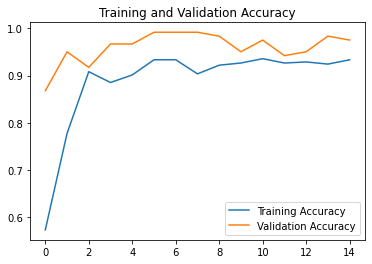

In [28]:
import matplotlib.pyplot as plt
epochs = range(0,15)
plt.plot(epochs, y.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, y.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

##Predictions

In [19]:
from keras.models import load_model
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image
from keras.utils import img_to_array

Loading the Model

In [20]:
model = load_model("forest.h5")

In this we are going to test our model and check its performance.

In [21]:
def prediction(img_path):
    i = cv2.imread(img_path)
    i = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
    img = Image.open(img_path)
    img = img.resize((128,128))
    x = img_to_array(img)
    x = np.expand_dims(x,axis=0)
    pred = model.predict(x)
    plt.imshow(i)
    print("%s"%("ALERT!!!FOREST FIRE DETECTED... SMS SENT.." if pred==[[1.]] else "NO FOREST FIRE DETECTED..."))

1/1 [==============================] - 0s 76ms/step
ALERT!!!FOREST FIRE DETECTED... SMS SENT..


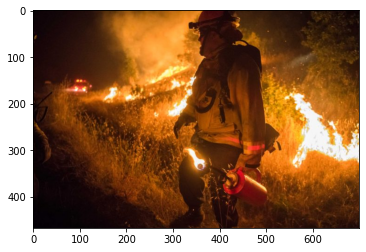

In [22]:
prediction(r"/content/drive/MyDrive/Datasets/Dataset/test_set/with fire/180802_CarrFire_010_large_700x467.jpg")


1/1 [==============================] - 0s 43ms/step
NO FOREST FIRE DETECTED...


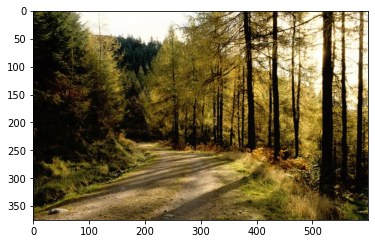

In [23]:
prediction(r'/content/drive/MyDrive/Datasets/Dataset/test_set/forest/1009821.jpg')

1/1 [==============================] - 0s 36ms/step
ALERT!!!FOREST FIRE DETECTED... SMS SENT..


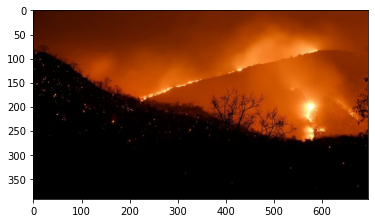

In [24]:
prediction(r'/content/drive/MyDrive/Datasets/Dataset/test_set/with fire/Fire_2_696x392.jpg')

In [25]:
!pip install twilio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
!pip install playsound==1.2.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
pip install pygobject

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import cv2 
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import librosa
from tensorflow.keras.preprocessing import image
from keras.models import load_model

#VIDEO ANALYSIS AND SMS ALERT

In this milestone, we perform video analysis to get the prediction for the input frames.If a forest fire is detected then will send an SMS Alert to the registered mobile number.

In [4]:
from twilio.rest import Client
from playsound import playsound

In [5]:
def video_test(vid_path):
    cap = cv2.VideoCapture(vid_path)
    if (cap.isOpened()== False): 
      print("Error opening video stream or file")
    while(cap.isOpened()):
      ret, frame = cap.read()
      if ret == True:
        x=image.img_to_array(frame)
        res=cv2.resize(x,dsize=(128,128),interpolation=cv2.INTER_CUBIC)
        x=np.expand_dims(res,axis=0)
        model=load_model("/content/forest.h5")
        cv2_imshow(frame)
        pred=model.predict(x)
        pred = int(pred[0][0])
        pred
        int(pred)
        if pred==0:
          print('Forest fire')
          account_sid = "ACb8327485cef89b8ed3adbe5cb710752f"
          auth_token = "d91caa0af197919cf188fb7ea0db9fb5"

          client = Client(account_sid, auth_token)
          message = client.messages.create(

          body="Forest Fire detected , Stay safe!!!",
          from_=("+18087364790"),
          to=("+917358598519")
          )
          print("ALERT!!!!FIRE DETECTED")
          print("SMS Sent")
          break
        elif pred==1:
             print('No DANGER....NO FIRE DETECTED')
             break
 
# When everything done, release the video capture object
    cap.release()
 
# Closes all the frames
    cv2.destroyAllWindows()

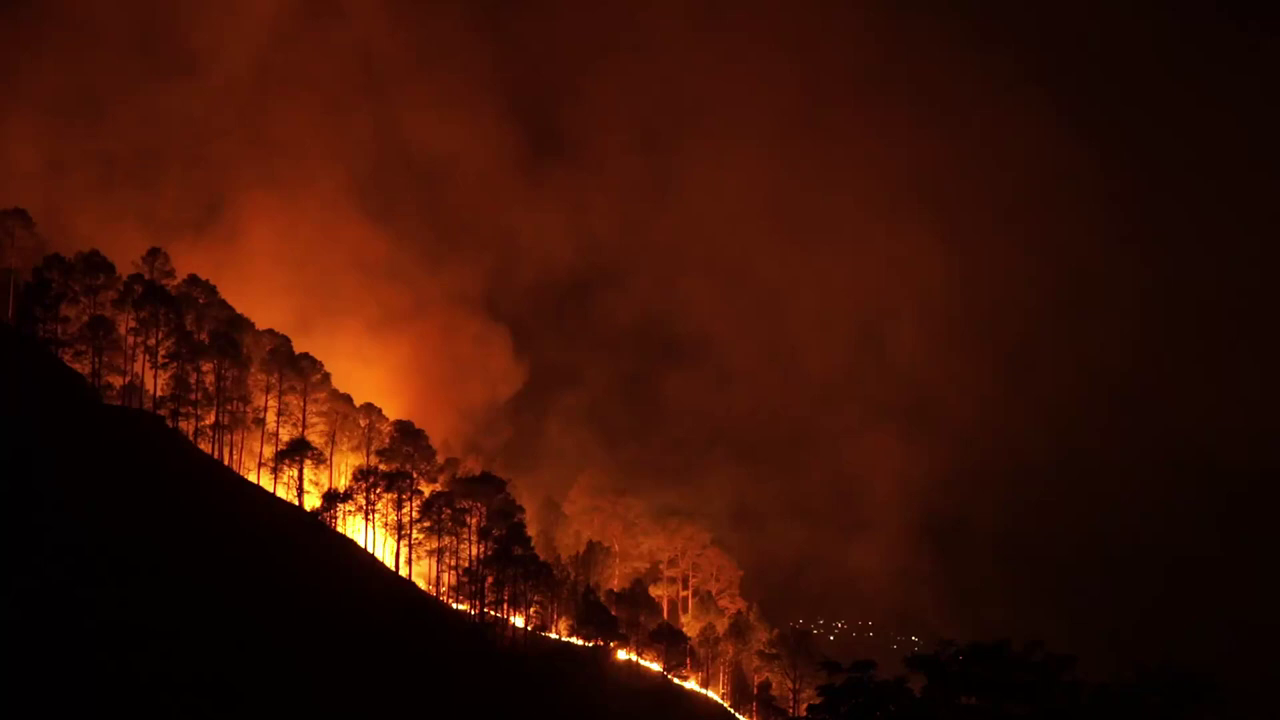

1/1 [==============================] - 0s 468ms/step
Forest fire
ALERT!!!!FIRE DETECTED
SMS Sent


In [6]:
video_test('/content/drive/MyDrive/Datasets/Dataset/videoplayback.mp4')